In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os, sys

# Relative paths
dirname = os.path.dirname
sep = os.sep

ml_folder = dirname(os.getcwd())
sys.path.append(ml_folder)

from src.utils import mining_data_tb as md
from src.utils import visualization_tb as vi

import warnings

warnings.filterwarnings("ignore")

## Loading the data

In [2]:
demographics_dfs = md.read_data(2, "1_demographics")
dietary_dfs = md.read_data(2, "2_dietary")
examination_dfs = md.read_data(2, "3_examination")
laboratory_dfs = md.read_data(2, "4_laboratory")
questionnaire_dfs = md.read_data(2, "5_questionnaire")

variable_names = pd.read_csv("../data/6_variables/0_final_variables.csv", index_col = 0)

## Preprocessing

In [3]:
##### Demographics
# Step 1
dem_cond_1 = variable_names["file_name"] == "DEMO_J"

# Step 2
dem_filter_1 = list(variable_names[dem_cond_1]["vAr_nAmE"].values)

# Step 3
demo_h = demographics_dfs["demo_h"].loc[:, dem_filter_1]
demo_i = demographics_dfs["demo_i"].loc[:, dem_filter_1]
demo_j = demographics_dfs["demo_j"].loc[:, dem_filter_1]

# Step 4
demo = pd.concat([demo_h, demo_i, demo_j])

In [4]:
##### Dietary
# Step 1
diet_cond_1 = variable_names["file_name"] == "DR1TOT_J"
diet_cond_2 = variable_names["file_name"] == "DR2TOT_J"

# Step 2
diet_filter_1 = list(variable_names[diet_cond_1]["vAr_nAmE"].values)
diet_filter_2 = list(variable_names[diet_cond_2]["vAr_nAmE"].values)

# Step 3
dr1tot_i = dietary_dfs["dr1tot_i"].loc[:, diet_filter_1]
dr1tot_j = dietary_dfs["dr1tot_j"].loc[:, diet_filter_1]
dr1tot_h = dietary_dfs["dr1tot_h"].loc[:, diet_filter_1]

dr2tot_i = dietary_dfs["dr2tot_i"].loc[:, diet_filter_2]
dr2tot_j = dietary_dfs["dr2tot_j"].loc[:, diet_filter_2]
dr2tot_h = dietary_dfs["dr2tot_h"].loc[:, diet_filter_2]

# Step 4
dr1tot = pd.concat([dr1tot_h, dr1tot_i, dr1tot_j])
dr2tot = pd.concat([dr2tot_h, dr2tot_i, dr2tot_j])

In [5]:
##### Examination
# Step 1
exam_cond_1 = variable_names["file_name"] == "BMX_J"
exam_cond_2 = variable_names["file_name"] == "BPX_J"
exam_cond_3 = variable_names["file_name"] == "DXX_J"

# Step 2
exam_filter_1 = list(variable_names[exam_cond_1]["vAr_nAmE"].values)
exam_filter_2 = list(variable_names[exam_cond_2]["vAr_nAmE"].values)
exam_filter_3 = list(variable_names[exam_cond_3]["vAr_nAmE"].values)

# Step 3
bmx_h = examination_dfs["bmx_h"].loc[:, exam_filter_1]
bmx_i = examination_dfs["bmx_i"].loc[:, exam_filter_1]
bmx_j = examination_dfs["bmx_j"].loc[:, exam_filter_1]

bpx_h = examination_dfs["bpx_h"].loc[:, exam_filter_2]
bpx_i = examination_dfs["bpx_i"].loc[:, exam_filter_2]
bpx_j = examination_dfs["bpx_j"].loc[:, exam_filter_2]

dxx_h = examination_dfs["dxx_h"].loc[:, exam_filter_3]
dxx_i = examination_dfs["dxx_i"].loc[:, exam_filter_3]
dxx_j = examination_dfs["dxx_j"].loc[:, exam_filter_3]

# Step 4
bmx = pd.concat([bmx_h, bmx_i, bmx_j])
bpx = pd.concat([bpx_h, bpx_i, bpx_j])
dxx = pd.concat([dxx_h, dxx_i, dxx_j])

In [6]:
##### Laboratory
# Step 1
lab_cond_1 = variable_names["file_name"] == "UCFLOW_J"
lab_cond_2 = variable_names["file_name"] == "ALB_CR_J"
lab_cond_3 = variable_names["file_name"] == "CBC_J"
lab_cond_4 = variable_names["file_name"] == "TCHOL_J"
lab_cond_5 = variable_names["file_name"] == "HDL_J"
lab_cond_6 = variable_names["file_name"] == "BIOPRO_J"
lab_cond_7 = variable_names["file_name"] == "COT_J"
lab_cond_8 = variable_names["file_name"] == "INS_J"
lab_cond_9 = variable_names["file_name"] == "TRIGLY_J"
lab_cond_10 = variable_names["file_name"] == "FOLATE_J"

# Step 2
lab_filter_1 = list(variable_names[lab_cond_1]["vAr_nAmE"].values)
lab_filter_2 = list(variable_names[lab_cond_2]["vAr_nAmE"].values)
lab_filter_3 = list(variable_names[lab_cond_3]["vAr_nAmE"].values)
lab_filter_4 = list(variable_names[lab_cond_4]["vAr_nAmE"].values)
lab_filter_5 = list(variable_names[lab_cond_5]["vAr_nAmE"].values)
lab_filter_6 = list(variable_names[lab_cond_6]["vAr_nAmE"].values)
lab_filter_7 = list(variable_names[lab_cond_7]["vAr_nAmE"].values)
lab_filter_8 = list(variable_names[lab_cond_8]["vAr_nAmE"].values)
lab_filter_9 = list(variable_names[lab_cond_9]["vAr_nAmE"].values)
lab_filter_10 = list(variable_names[lab_cond_10]["vAr_nAmE"].values)

# Step 3
ucflow_h = laboratory_dfs["ucflow_h"].loc[:, lab_filter_1]
ucflow_i = laboratory_dfs["ucflow_i"].loc[:, lab_filter_1]
ucflow_j = laboratory_dfs["ucflow_j"].loc[:, lab_filter_1]

alb_cr_h = laboratory_dfs["alb_cr_h"].loc[:, lab_filter_2]
alb_cr_i = laboratory_dfs["alb_cr_i"].loc[:, lab_filter_2]
alb_cr_j = laboratory_dfs["alb_cr_j"].loc[:, lab_filter_2]

cbc_h = laboratory_dfs["cbc_h"].loc[:, lab_filter_3]
cbc_i = laboratory_dfs["cbc_i"].loc[:, lab_filter_3]
cbc_j = laboratory_dfs["cbc_j"].loc[:, lab_filter_3]

tchol_h = laboratory_dfs["tchol_h"].loc[:, lab_filter_4]
tchol_i = laboratory_dfs["tchol_i"].loc[:, lab_filter_4]
tchol_j = laboratory_dfs["tchol_j"].loc[:, lab_filter_4]

hdl_h = laboratory_dfs["hdl_h"].loc[:, lab_filter_5]
hdl_i = laboratory_dfs["hdl_i"].loc[:, lab_filter_5]
hdl_j = laboratory_dfs["hdl_j"].loc[:, lab_filter_5]

biopro_h = laboratory_dfs["biopro_h"].loc[:, lab_filter_6]
biopro_i = laboratory_dfs["biopro_i"].loc[:, lab_filter_6]
biopro_j = laboratory_dfs["biopro_j"].loc[:, lab_filter_6]

cot_h = laboratory_dfs["cot_h"].loc[:, lab_filter_7]
cot_i = laboratory_dfs["cot_i"].loc[:, lab_filter_7]
cot_j = laboratory_dfs["cot_j"].loc[:, lab_filter_7]

ins_h = laboratory_dfs["ins_h"].loc[:, lab_filter_8]
ins_i = laboratory_dfs["ins_i"].loc[:, lab_filter_8]
ins_j = laboratory_dfs["ins_j"].loc[:, lab_filter_8]

trigly_h = laboratory_dfs["trigly_h"].loc[:, lab_filter_9]
trigly_i = laboratory_dfs["trigly_i"].loc[:, lab_filter_9]
trigly_j = laboratory_dfs["trigly_j"].loc[:, lab_filter_9]

folate_h = laboratory_dfs["folate_h"].loc[:, lab_filter_10]
folate_i = laboratory_dfs["folate_i"].loc[:, lab_filter_10]
folate_j = laboratory_dfs["folate_j"].loc[:, lab_filter_10]

# Step 4
ucflow = pd.concat([ucflow_h, ucflow_i, ucflow_j])
alb_cr = pd.concat([alb_cr_h, alb_cr_i, alb_cr_j])
cbc = pd.concat([cbc_h, cbc_i, cbc_j])
tchol = pd.concat([tchol_h, tchol_i, tchol_j])
hdl = pd.concat([hdl_h, hdl_i, hdl_j])
cot = pd.concat([cot_h, cot_i, cot_j])
biopro = pd.concat([biopro_h, biopro_i, biopro_j])
ins = pd.concat([ins_h, ins_i, ins_j])
trigly = pd.concat([trigly_h, trigly_i, trigly_j])
folate = pd.concat([folate_h, folate_i, folate_j])

In [7]:
##### Questionnaire
# Step 1
quest_cond_1 = variable_names["file_name"] == "MCQ_J"
quest_cond_2 = variable_names["file_name"] == "BPQ_J"
quest_cond_3 = variable_names["file_name"] == "DIQ_J"

# Step 2
quest_filter_1 = list(variable_names[quest_cond_1]["vAr_nAmE"].values)
quest_filter_2 = list(variable_names[quest_cond_2]["vAr_nAmE"].values)
quest_filter_3 = list(variable_names[quest_cond_3]["vAr_nAmE"].values)

# Step 3
mcq_h = questionnaire_dfs["mcq_h"].loc[:, quest_filter_1]
mcq_i = questionnaire_dfs["mcq_i"].loc[:, quest_filter_1]
mcq_j = questionnaire_dfs["mcq_j"].loc[:, quest_filter_1]

bpq_h = questionnaire_dfs["bpq_h"].loc[:, quest_filter_2]
bpq_i = questionnaire_dfs["bpq_i"].loc[:, quest_filter_2]
bpq_j = questionnaire_dfs["bpq_j"].loc[:, quest_filter_2]

diq_h = questionnaire_dfs["diq_h"].loc[:, quest_filter_3]
diq_i = questionnaire_dfs["diq_i"].loc[:, quest_filter_3]
diq_j = questionnaire_dfs["diq_j"].loc[:, quest_filter_3]

# Step 4
mcq = pd.concat([mcq_h, mcq_i, mcq_j])
bpq = pd.concat([bpq_h, bpq_i, bpq_j])
diq = pd.concat([diq_h, diq_i, diq_j])

## Joining the data

In [8]:
final_df = pd.merge(demo, dr1tot, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, dr2tot, how = "outer", on = "SEQN")

final_df = pd.merge(final_df, bmx, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, bpx, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, dxx, how = "outer", on = "SEQN")

final_df = pd.merge(final_df, ucflow, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, alb_cr, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, cbc, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, tchol, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, hdl, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, cot, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, biopro, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, ins, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, trigly, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, folate, how = "outer", on = "SEQN")

final_df = pd.merge(final_df, mcq, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, bpq, how = "outer", on = "SEQN")
final_df = pd.merge(final_df, diq, how = "outer", on = "SEQN")

final_df.shape

(29400, 171)

## Exploratory analysis

In [9]:
final_df.iloc[:, :100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29400 entries, 73557 to 102956
Data columns (total 100 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  29400 non-null  int64  
 1   RIDAGEYR  29400 non-null  int64  
 2   DR1TALCO  24342 non-null  float64
 3   DR1TATOC  24342 non-null  float64
 4   DR1TBCAR  24342 non-null  float64
 5   DR1TCAFF  24342 non-null  float64
 6   DR1TCALC  24342 non-null  float64
 7   DR1TCARB  24342 non-null  float64
 8   DR1TCHOL  24342 non-null  float64
 9   DR1TCRYP  24342 non-null  float64
 10  DR1TFA    24342 non-null  float64
 11  DR1TFIBE  24342 non-null  float64
 12  DR1TIRON  24342 non-null  float64
 13  DR1TKCAL  24342 non-null  float64
 14  DR1TLYCO  24342 non-null  float64
 15  DR1TLZ    24342 non-null  float64
 16  DR1TMAGN  24342 non-null  float64
 17  DR1TMFAT  24342 non-null  float64
 18  DR1TMOIS  24342 non-null  float64
 19  DR1TNIAC  24342 non-null  float64
 20  DR1TPFAT  24342 non-nu

In [10]:
final_df.iloc[:, 100:200].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29400 entries, 73557 to 102956
Data columns (total 71 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBDEONO   24158 non-null  float64
 1   LBDLYMNO  24158 non-null  float64
 2   LBDMONO   24158 non-null  float64
 3   LBDNENO   24158 non-null  float64
 4   LBXBAPCT  24158 non-null  float64
 5   LBXEOPCT  24158 non-null  float64
 6   LBXHCT_x  24189 non-null  float64
 7   LBXHGB    24189 non-null  float64
 8   LBXLYPCT  24158 non-null  float64
 9   LBXMC     24219 non-null  float64
 10  LBXMCHSI  24189 non-null  float64
 11  LBXMCVSI  24189 non-null  float64
 12  LBXMOPCT  24158 non-null  float64
 13  LBXMPSI   24189 non-null  float64
 14  LBXNEPCT  24158 non-null  float64
 15  LBXPLTSI  24189 non-null  float64
 16  LBXRBCSI  24189 non-null  float64
 17  LBXRDW    24189 non-null  float64
 18  LBXWBCSI  24189 non-null  float64
 19  LBXTC     21618 non-null  float64
 20  LBDHDD    21618 non-nul

In [11]:
final_df.iloc[:, 200:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29400 entries, 73557 to 102956
Empty DataFrame

In [12]:
filtered_df = final_df[final_df["MCQ160B"].notna()]

In [13]:
filtered_df.MCQ160F.value_counts()

2.0    16353
1.0      684
9.0       20
Name: MCQ160F, dtype: int64

In [14]:
cond_b = filtered_df.MCQ160B != 9
cond_c = filtered_df.MCQ160C != 7
cond_d = (filtered_df.MCQ160D != 9) & (filtered_df.MCQ160D != 7)
cond_e = filtered_df.MCQ160E != 9
cond_f = filtered_df.MCQ160F != 9

filtered_df_2 = filtered_df[(cond_b) & (cond_c) & (cond_d) & (cond_e) & (cond_f)]
filtered_df_2.shape

(16942, 171)

In [15]:
filtered_df_2["heart_issue"] = 0

pos_cond_b = filtered_df.MCQ160B == 1
pos_cond_c = filtered_df.MCQ160C == 1
pos_cond_d = filtered_df.MCQ160D == 1
pos_cond_e = filtered_df.MCQ160E == 1
pos_cond_f = filtered_df.MCQ160F == 1

filtered_df_2.loc[(pos_cond_b) | (pos_cond_c) | (pos_cond_d) | (pos_cond_e) | (pos_cond_f), "heart_issue"] = 1

In [16]:
filtered_df_2.heart_issue.value_counts()

0    15079
1     1863
Name: heart_issue, dtype: int64

In [26]:
"RIAGENDR" in list(variable_names.vAr_nAmE)

True

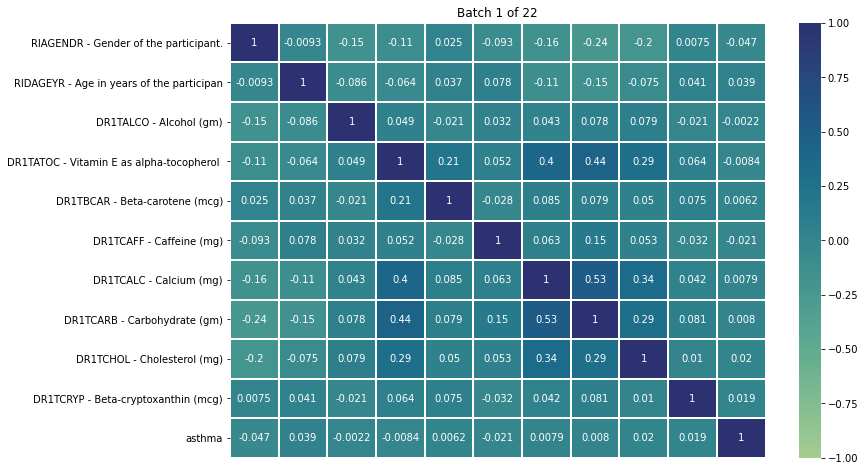

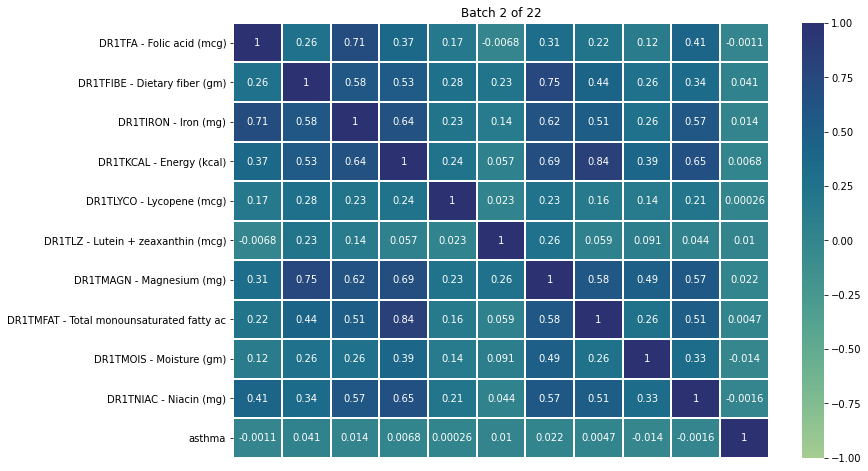

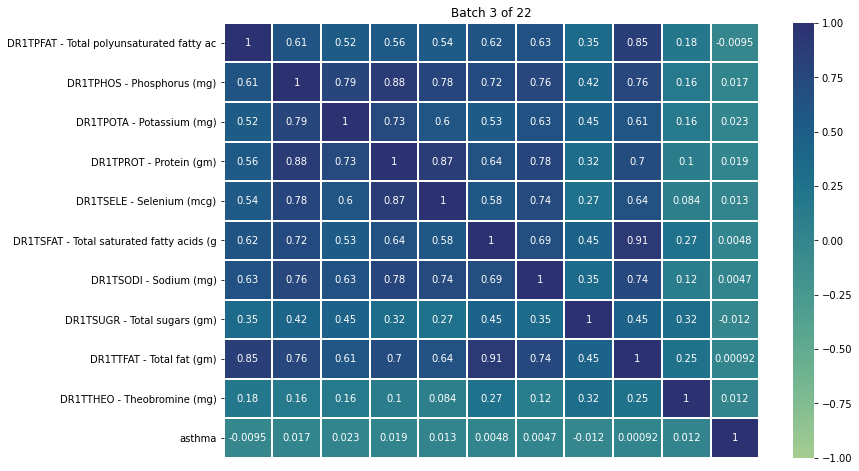

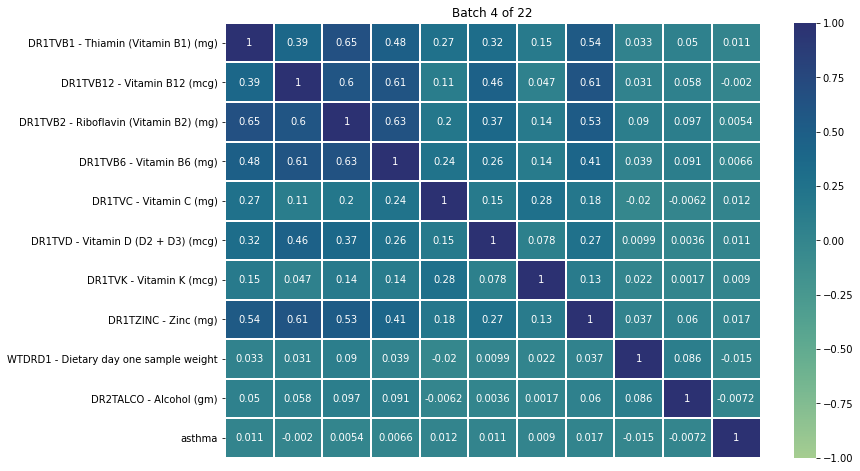

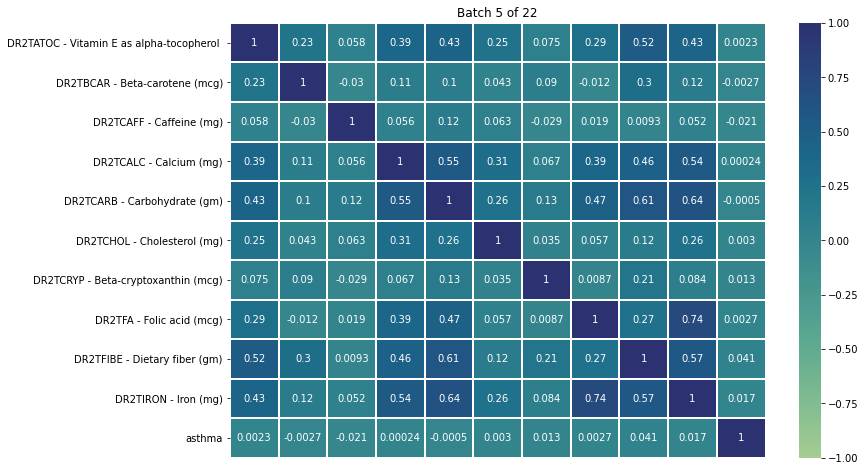

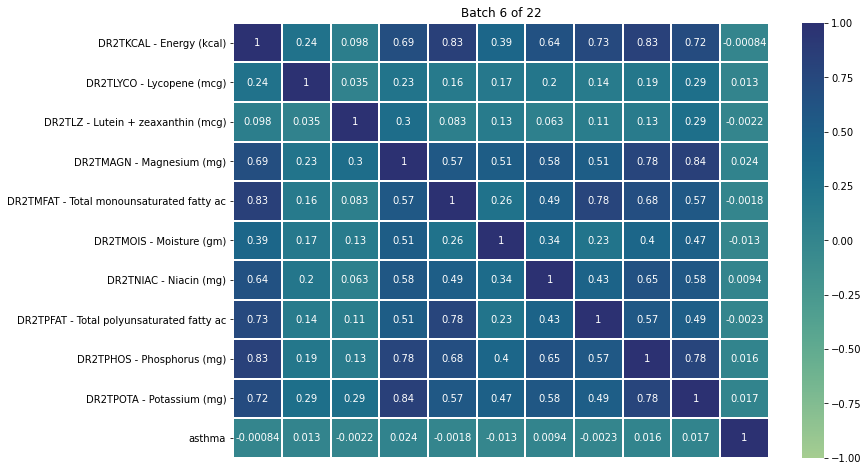

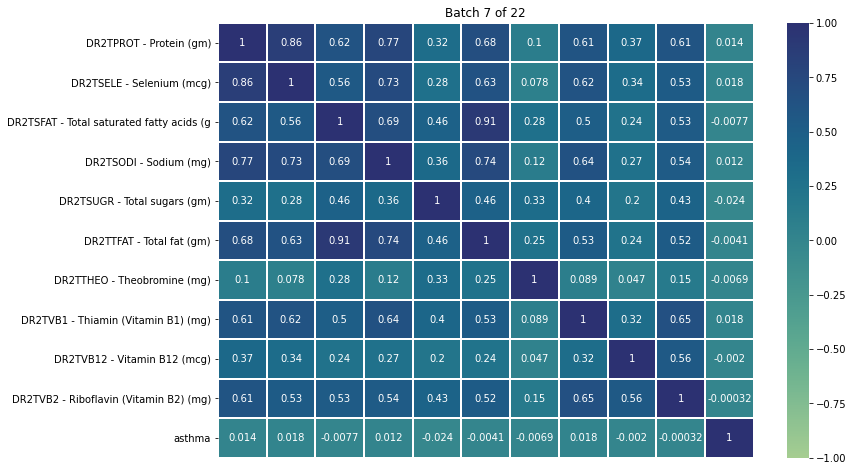

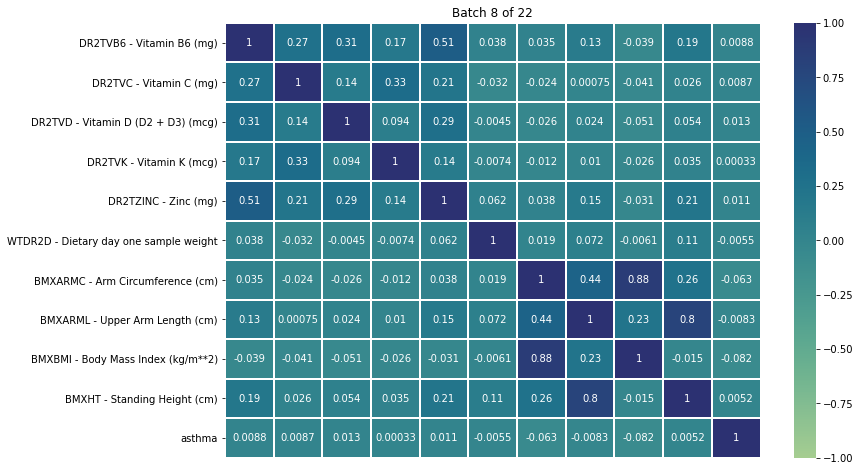

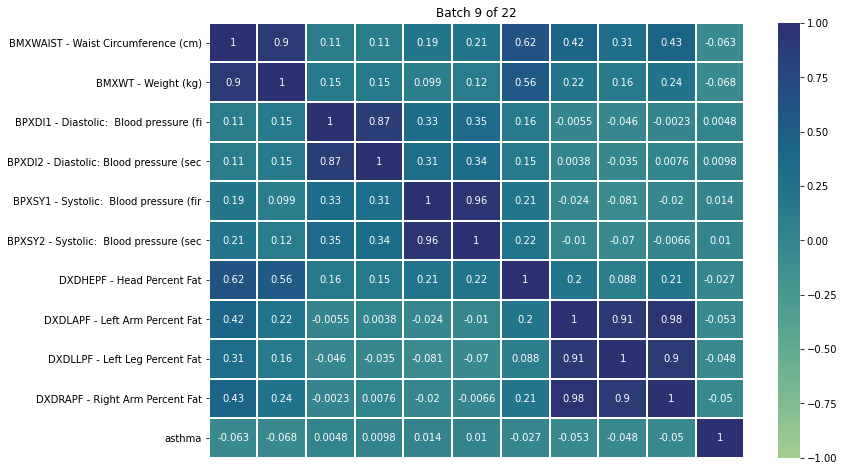

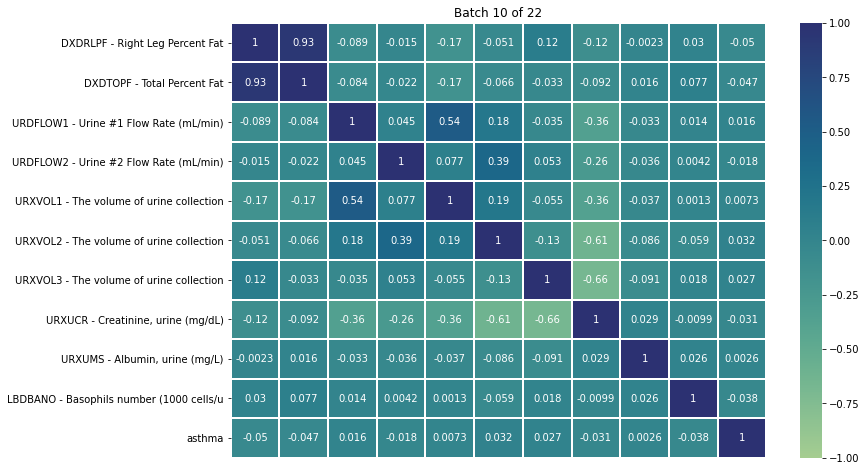

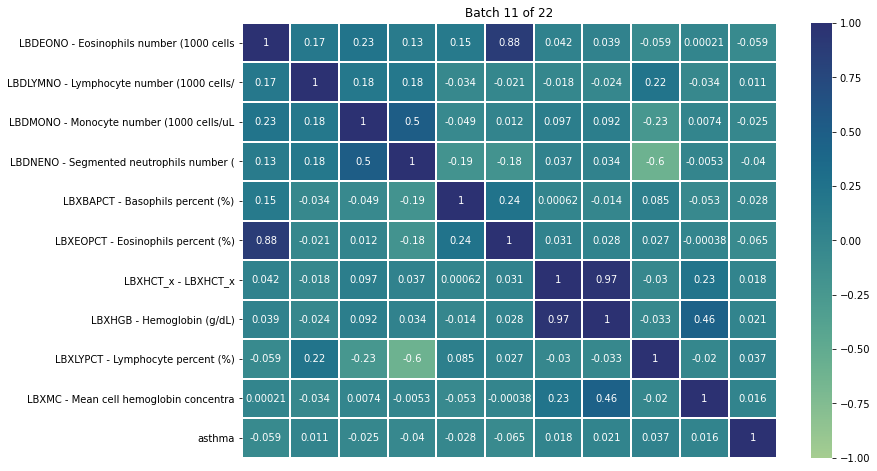

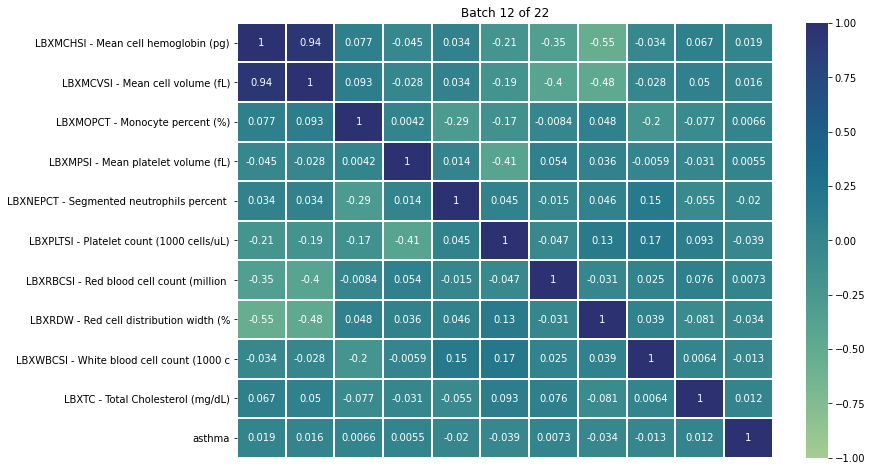

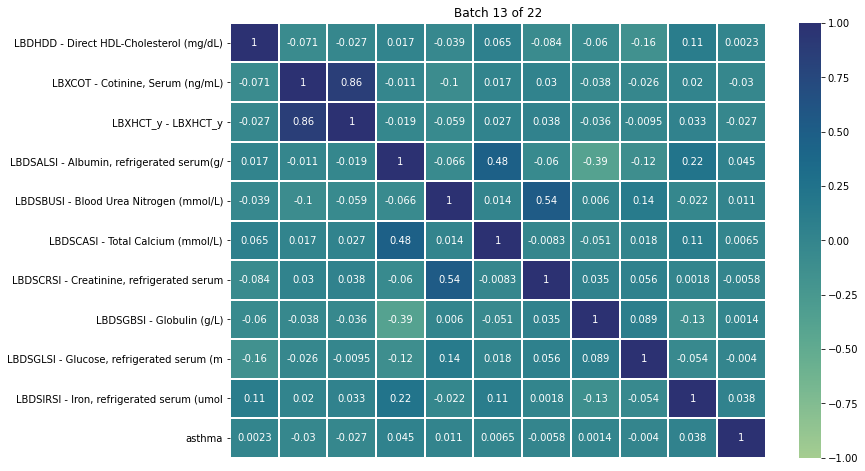

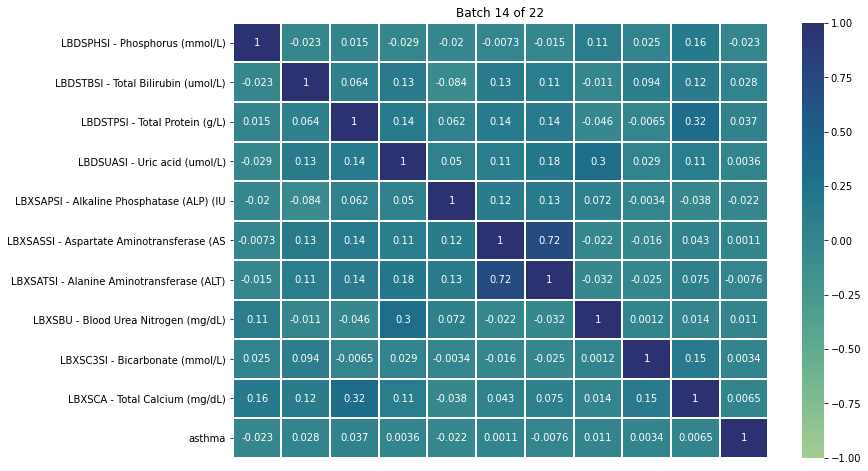

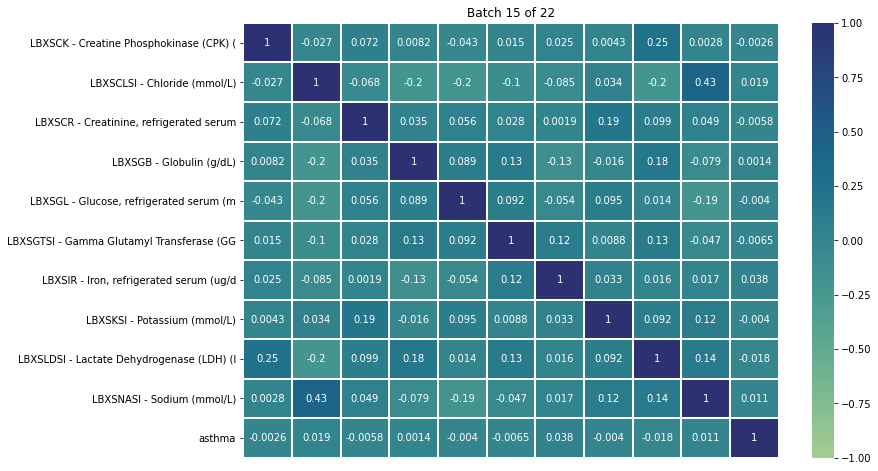

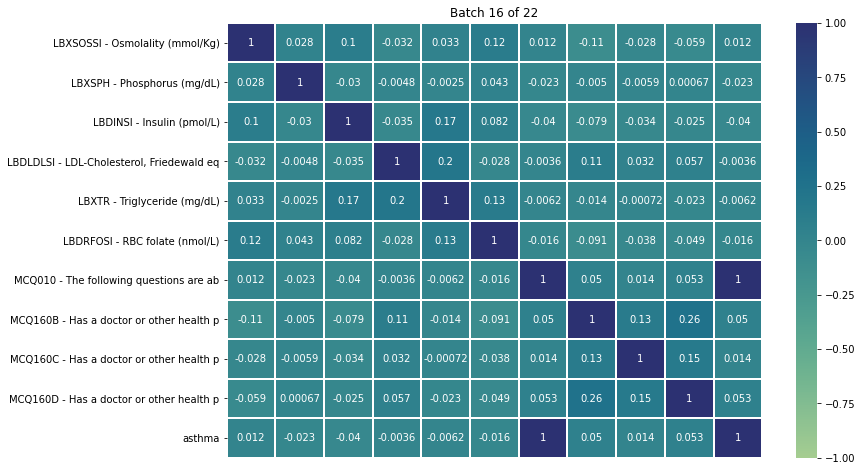

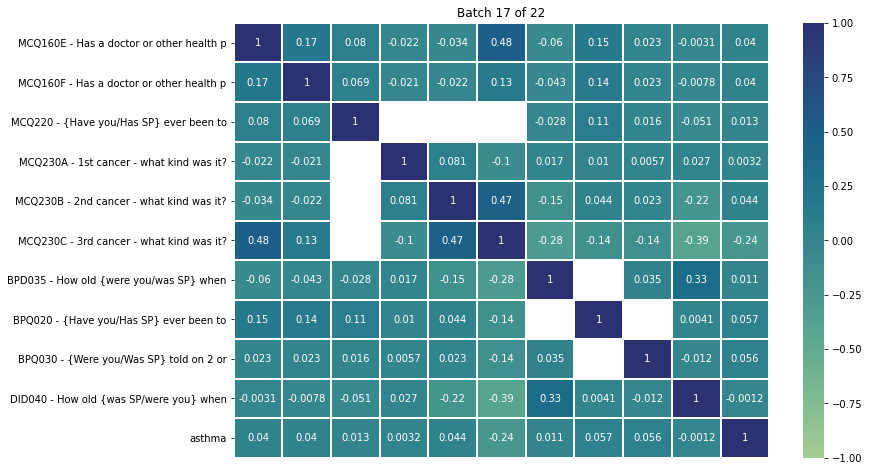

In [34]:
start = 0
stop = 10

count = 1

while stop < 180:
    X = filtered_df_2.iloc[:, start:stop]
    y = filtered_df_2.MCQ010

    labels = [column + " - " + md.var_descr_detector(column, variable_names)[:30] for column in X.columns] + ["asthma"]

    to_corr = pd.merge(X, y, how = "outer", on = "SEQN")
    corr = to_corr.corr()

    plt.figure(figsize = (12, 8))
    sns.heatmap(corr, annot = True, linewidths = .1, cmap = "crest", xticklabels = False, yticklabels = labels, vmin = -1, vmax = 1)
    plt.title(f"Batch {count} of 22")
    plt.show()

    start += 10
    stop += 10
    count += 1

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold

import sklearn.metrics as metrics

In [52]:
filtered_df_3 = filtered_df_2.dropna(axis = 1, thresh = 14000)
filtered_df_3 = filtered_df_3.dropna()

In [72]:
to_drop = list(variable_names[variable_names["file_name"] == "MCQ_J"].loc[:, "vAr_nAmE"])[:-3]

X = np.array(filtered_df_3.drop(to_drop, axis = 1))
y = np.array(filtered_df_3.heart_issue)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1, random_state = 42)

model = LogisticRegression(max_iter = 200, n_jobs = -1)

In [73]:
train_scores = []
val_scores = []
count = 1

for (train, val) in kfold.split(X_train, y_train):

    # Train-Validation sets
    x_t, y_t = X_train[train], y_train[train]
    x_v, y_v = X_train[val], y_train[val]

    # Training
    model.fit(x_t, y_t)

    # Scores
    train_score = model.score(x_t, y_t)
    val_score = model.score(x_v, y_v)

    train_scores.append(train_score)
    val_scores.append(val_score)

    print(f"\nModel {count}")
    print("\ntrain score:", train_score)
    print("test score:", val_score)
    print("#" * 75)

    count += 1


Model 1

train score: 0.9242132305716121
test score: 0.9216944801026957
###########################################################################

Model 2

train score: 0.9245464761598973
test score: 0.9242132305716121
###########################################################################

Model 3

train score: 0.922780542623214
test score: 0.9229287090558767
###########################################################################

Model 4

train score: 0.924707015572323
test score: 0.922286448298009
###########################################################################

Model 5

train score: 0.923422700272917
test score: 0.9261400128452152
###########################################################################


In [74]:
# Training with full train_data
model.fit(X_train, y_train)

# Internal structure
y_train_unique, y_train_counts = np.unique(y_train, return_counts=True)
y_test_unique, y_test_counts = np.unique(y_test, return_counts=True)

# Scores
train_score_ = model.score(X_train, y_train)
test_score_ = model.score(X_test, y_test)

# Prediction
prediction = model.predict(X_test)

# Confusion matrix
cm = metrics.confusion_matrix(y_test, prediction)


print("Train score:", train_score_)
print("Test score:", test_score_)
print("\nConfusion matrix\n", cm)

Train score: 0.9244798356023632
Test score: 0.9332306111967129

Confusion matrix
 [[1817    1]
 [ 129    0]]
